<img src="https://imgur.com/3U3hI1u.png" width="100%" />

#### Boas vindas a sua segunda e última tarefa de Aprendizado por Reforço!

Neste exercício, você deverá implementar e comparar diferentes algoritmos de **Aprendizado por Reforço Profundo** utilizando a biblioteca _[Stable Baselines 3](https://stable-baselines3.readthedocs.io/en/master/)_.

A _Stable Baselines_ é uma biblioteca de Aprendizado por Reforço que implementa diversos algoritmos de agentes, além de várias funcionalidades úteis para seu treinamento. Suas implementações são bem simples e intuitivas, mas sem deixarem de ser otimizadas e poderosas, buscando facilitar o desenvolvimento de projetos de reforço de alta qualidade.

Antes de começar a tarefa, é importante acessar e se familiarizar com o tutorial da biblioteca disponível neste repositório! Depois de rodar o guia, você já estará capaz de completar este trabalho.

## Escolha do Ambiente

Antes de analisar o possíveis algoritmos, o primeiro passo é escolher qual ambiente você quer resolver! Para esta tarefa, separamos quatro possíveis ambientes diferentes, em ordem de dificuldade, que você poderá escolher: **Pong**, **Lunar Lander** e **Lunar Lander Continuous**. Lembrando que, quanto mais difícil um ambiente, mais demorado será o treinamento.

A seguir, estão as descrições de cada um deles:

<h2 align="center">Pong</h2>
<img src="https://imgur.com/vdVCmvo.gif" width=50% />

**Pong** é o ambiente de Aprendizado por Reforço criado pelo Turing que simula o jogo de *Pong*, no qual existem duas "raquetes" e uma bola, e o objetivo de cada uma das raquetes é não somente evitar que a bola passe por ela, como também fazer com que esta passe pela linha que a outra raquete protege.

### Características do Ambiente

O **Espaço de Observação** do ambiente é definido por 2 informações.

| Estado    | Informação                            |
| :-------- | :------------------------------------ |
| 0         | Distância _x_ entre a bola e o agente |
| 1         | Distância _y_ entre a bola e o agente |

Já o **Espaço de Ação** é composto por três ações: mover o jogador para cima, baixo, ou deixá-lo parado.

| Ação | Significado      |
| :--- | :--------------- |
| 0    | Ficar parado     |
| 1    | Mover para baixo |
| 2    | Mover para cima  |

Por fim, cada vez que tomamos uma ação, recebemos do ambiente uma **recompensa**, conforme a tabela abaixo:

| Ocorrência          | Recompensa |
| :------------------ | ---------: |
| Ponto do Agente     | $+500$     |
| Ponto do Oponente   | $-500$     |
| Vitória do Agente   | $+2000$    |
| Vitória do Oponente | $-2000$    |

O primeiro jogador a fazer quatro pontos ganha o jogo. Além disso, as recompensas são cumulativas. Isso significa que se o oponente fizer um ponto _e_ ganhar o jogo, a recompensa é de $-2500$.

### Instalação

Para instalar os ambientes criados pelo Turing, basta rodar o seguinte comando no notebook (se preferir, também pode rodar no terminal; é só tirar o ponto de exclamação do começo da linha):

In [1]:
!pip install -U turing-envs

Com o ambiente do Turing instalado, podemos testar um modelo! Para isso, vamos precisar de 2 bibliotecas: **gym** (para inicialização dos ambientes) e **stable_baselines3** (para inicialização e avaliação dos modelos):

In [3]:
import gym 
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3 import PPO

# Definindo ambiente
env = gym.make("turing_envs:pong-normal-v0")

# Definindo modelo
model = PPO("MlpPolicy", env, seed=1, verbose=1)

# Avaliando o agente
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=5, deterministic=True)

print(f"Recompensa Média: {mean_reward:.2f} +/- {std_reward}")

In [2]:
import gym
from stable_baselines3.common.evaluation import evaluate_policy

<h2 align="center">Lunar Lander</h2>

<img src="https://raw.githubusercontent.com/fakemonk1/Reinforcement-Learning-Lunar_Lander/master/images/3.gif" width=50% />

**Lunar Lander** é um ambiente do Gym que simula o pouso de um módulo lunar na Lua. O agente deve controlar os três motores do módulo para guiá-lo até a pista de pouso, sem gastar muita energia.

### Características do Ambiente

O **Espaço de Observação** do ambiente é definido por 8 informações.

| Estado    | Informação                                     |
| :-------- | :--------------------------------------------- |
| 0         | Posição no eixo _x_ do módulo                  |
| 1         | Posição no eixo _y_ do módulo                  |
| 2         | Velocidade no eixo _x_ do módulo               |
| 3         | Velocidade no eixo _y_ do módulo               |
| 4         | Ângulo do módulo                               |
| 5         | Velocidade angular do módulo                   |
| 6         | Se a perna esquerda está em contato com o chão |
| 7         | Se a perna direita está em contato com o chão  |

Já o **Espaço de Ação** é composto por quatro ações: não fazer nada, acionar o motor esquerdo, acionar o motor principal ou acionar o motor direito.

| Ação | Significado             |
| :--- | :---------------------- |
| 0    | Não fazer nada          |
| 1    | Acionar motor esquerdo  |
| 2    | Acionar motor principal |
| 3    | Acionar motor direito   |

Por fim, cada vez que tomamos uma ação, recebemos do ambiente uma **recompensa**, conforme a tabela abaixo:

| Ocorrência              | Recompensa       |
| :---------------------- | ---------------: |
| Se aproximar da pista   | Até $+140$       |
| Pousar                  | $+100$           |
| Colidir                 | $-100$           |
| Tocar uma perna no chão | $+10$            |
| Acionar motor principal | $-0.3$ por frame |

#### Lunar Lander Continuous

Também existe uma versão contínua do ambiente do Lunar Lander, no qual podemos controlar a força que cada um dos motores do módulo exercerá. Nesse caso, teremos duas ações:

| Ação | Intervalo  | Significado                          |
| :--- | :--------: | :----------------------------------- |
| 0    | $-1$ a $+1$ | Força do motor principal             |
| 1    | $-1$ a $+1$ | Força dos motores esquerdo e direito |

Na versão contínua, os algoritmos que poderemos usar serão diferentes, e o treinamento provavlmente será mais difícil.

### Instalação

Para instalar os ambientes do Gym que usam a engine Box2D, é necessário rodar os seguintes comandos numa célula do notebook (se preferir, também pode rodar no terminal; é só tirar o ponto de exclamação do começo da linha):


**Windows**

In [29]:
!conda install swig
!pip install box2d box2d-kengz

'conda' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


  error: subprocess-exited-with-error
  
  × Running setup.py install for box2d-kengz did not run successfully.
  │ exit code: 1
  ╰─> [16 lines of output]
      Using setuptools (version 58.1.0).
      running install
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.9
      creating build\lib.win-amd64-3.9\Box2D
      copying library\Box2D\Box2D.py -> build\lib.win-amd64-3.9\Box2D
      copying library\Box2D\__init__.py -> build\lib.win-amd64-3.9\Box2D
      creating build\lib.win-amd64-3.9\Box2D\b2
      copying library\Box2D\b2\__init__.py -> build\lib.win-amd64-3.9\Box2D\b2
      running build_ext
      building 'Box2D._Box2D' extension
      swigging Box2D\Box2D.i to Box2D\Box2D_wrap.cpp
      swig.exe -python -c++ -IBox2D -small -O -includeall -ignoremissing -w201 -globals b2Globals -outdir library\Box2D -keyword -w511 -D_SWIG_KWARGS -o Box2D\Box2D_wrap.cpp Box2D\Box2D.i
      error: command 'swig.exe' failed: None
      [end of


  Using cached Box2D-2.3.2.tar.gz (427 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Box2D-kengz-2.3.3.tar.gz (425 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for box2d, since package 'wheel' is not installed.
Using legacy 'setup.py install' for box2d-kengz, since package 'wheel' is not installed.
  Running setup.py install for box2d-kengz: started
  Running setup.py install for box2d-kengz: finished with status 'error'


**Linux**

In [ ]:
!apt install swig
!pip install -u 'gym[box2d]'

Em seguida, para criar o ambiente, roda-se a linha de código a seguir:

In [4]:
env = gym.make("LunarLander-v2")

ou

In [8]:
env = gym.make("LunarLanderContinuous-v2")

### Exercício 1 - Testando Modelos

Caro piloto, agora que você conhece esses dois ambientes, é hora de brincar com eles. Você deverá testar diferentes algoritmos (a seu critério), e ver sua recompensa média. Para ver quais as limitações dos modelos, veja esse [link](https://stable-baselines3.readthedocs.io/en/master/guide/algos.html). Abaixo, criamos uma função que será útil para comparar os modelos posteriormente.

In [3]:
def getValues(model, env, n_episodes, info_dict):
    model_name = str(model.__class__).split(".")[-1][:-2]

    mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=n_episodes, deterministic=True)
    
    info_dict[model_name] = {}
    info_dict[model_name]["mean_reward"] = mean_reward
    info_dict[model_name]["std_reward"] = std_reward
    
    return info_dict

algorithms_dict = {}

In [11]:
import matplotlib.pyplot as plt
from stable_baselines3.common import results_plotter

def plot_results(log_folder, window=10, title="Curva de Aprendizado"):
    """
    Plota os resultados.

    :param log_folder: (str) diretório dos resultados a serem plotados
    :param window: (int) tamanho da janela da média móvel
    :param title: (str) título do plot
    """
    # Obtém os resultados
    results = results_plotter.load_results(log_folder)
    x, y = results_plotter.ts2xy(results, "timesteps")
    
    # Calcula a média móvel do retorno
    y_smoothed = results_plotter.rolling_window(y, window=window).mean(axis=1)
    
    # Plota os resultados
    fig = plt.figure(title, figsize=(10, 5))
    plt.scatter(x, y, s=2)
    plt.plot(x[window-1:], y_smoothed, color="darkblue", label="Média Móvel")
    plt.xlabel("Timesteps")
    plt.ylabel("Retorno Médio")
    plt.title(title)
    plt.legend()
    plt.show()

#### Treinando e Avaliando seu próprio modelo

Primeiramente, agora você deve decidir em qual ambiente você deseja treinar seu agente. Para isto, basta tirar o comentário da linha referente ao ambiente escolhido:

In [4]:
env_name = "turing_envs:pong-normal-v0"
# env_name = "LunarLander-v2"
# env_name = "LunarLanderContinuous-v2"

Em seguida, você está livre para testar diferentes algoritmos para seu ambiente!

In [8]:
import os
from stable_baselines3.common.monitor import Monitor

# Cria um diretório de logs
log_dir = "./logs/"
os.makedirs(log_dir, exist_ok=True)

#### PPO

Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -4e+03   |
| time/              |          |
|    fps             | 382      |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 608          |
|    ep_rew_mean          | -3.92e+03    |
| time/                   |              |
|    fps                  | 305          |
|    iterations           | 2            |
|    time_elapsed         | 13           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0058134426 |
|    clip_fraction        | 0.0269       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.09        |
|    e

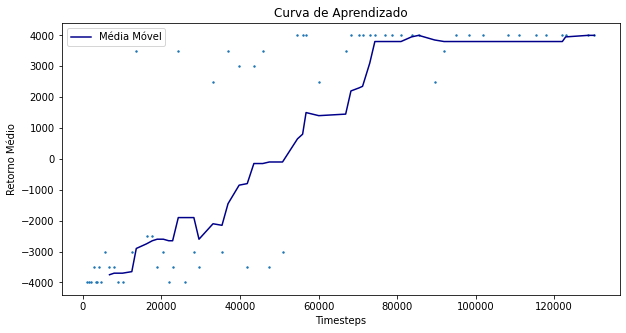

In [12]:
from stable_baselines3 import PPO # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = gym.make(env_name)

# Encapsula ele no wrapper Monitor
env = Monitor(env, log_dir)


model = PPO("MlpPolicy", env, seed=1, verbose=1) # Defina o modelo
model.learn(total_timesteps= 100000) # Treine o modelo
n_episodes = 10 # Defina o número de episódios

# Avaliando o agente e guardando o desempenho no dicionário
algorithms_dict = getValues(model, env, n_episodes, algorithms_dict)

### Espaço para o Piloto criar gráficos ou textos para mostrar os diferentes resultados entre modelos
plot_results(log_dir)

#### A2C

Using cpu device
Wrapping the env in a DummyVecEnv.
------------------------------------
| time/                 |          |
|    fps                | 115      |
|    iterations         | 100      |
|    time_elapsed       | 4        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.02    |
|    explained_variance | -52.7    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.00713 |
|    value_loss         | 0.000575 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 143      |
|    iterations         | 200      |
|    time_elapsed       | 6        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -1.09    |
|    explained_variance | -0.186   |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss       

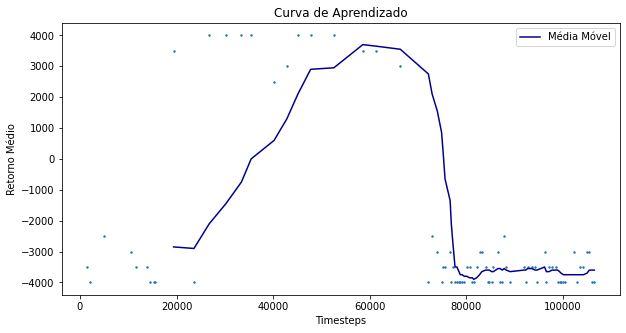

In [14]:
### Espaço livre para testagem de diferentes algoritmos

from stable_baselines3 import A2C # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = gym.make(env_name)
# Encapsula ele no wrapper Monitor
env = Monitor(env, log_dir)

model = A2C("MlpPolicy", env, seed=1, verbose=1) # Defina o modelo
model.learn(total_timesteps= 100000) # Treine o modelo
n_episodes = 10 # Defina o número de episódios

# Avaliando o agente e guardando o desempenho no dicionário
algorithms_dict = getValues(model, env, n_episodes, algorithms_dict)

### Espaço para o Piloto criar gráficos ou textos para mostrar os diferentes resultados entre modelos
plot_results(log_dir)

#### TRPO

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -4e+03   |
| time/              |          |
|    fps             | 398      |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 2048     |
---------------------------------
--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 664      |
|    ep_rew_mean          | -4e+03   |
| time/                   |          |
|    fps                  | 373      |
|    iterations           | 2        |
|    time_elapsed         | 10       |
|    total_timesteps      | 4096     |
| train/                  |          |
|    explained_variance   | 0.00104  |
|    is_line_search_su... | 1        |
|    kl_divergence_loss   | 0.00402  |
|    learning_rate        | 0.001    |
|    n_updates            | 1        |
|    policy_objective  

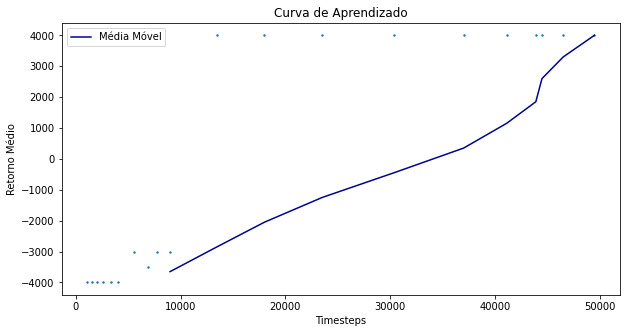

In [15]:
### Espaço livre para testagem de diferentes algoritmos
from stable_baselines3.common.monitor import Monitor
from sb3_contrib import TRPO # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = gym.make(env_name)
# Encapsula ele no wrapper Monitor
env = Monitor(env, log_dir)

model = TRPO("MlpPolicy", env, seed=1, verbose=1) # Defina o modelo
model.learn(total_timesteps= 10000) # Treine o modelo
n_episodes = 10 # Defina o número de episódios

# Avaliando o agente e guardando o desempenho no dicionário
algorithms_dict = getValues(model, env, n_episodes, algorithms_dict)

### Espaço para o Piloto criar gráficos ou textos para mostrar os diferentes resultados entre modelos
plot_results(log_dir)

#### ARS

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Using cpu device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 674       |
|    ep_rew_mean     | -3.66e+03 |
|    return_std      | 352       |
| time/              |           |
|    fps             | 771       |
|    time_elapsed    | 13        |
|    total_timesteps | 10776     |
| train/             |           |
|    delta_std       | 0.05      |
|    iterations      | 0         |
|    learning_rate   | 0.02      |
|    step_size       | 7.1e-06   |
----------------------------------


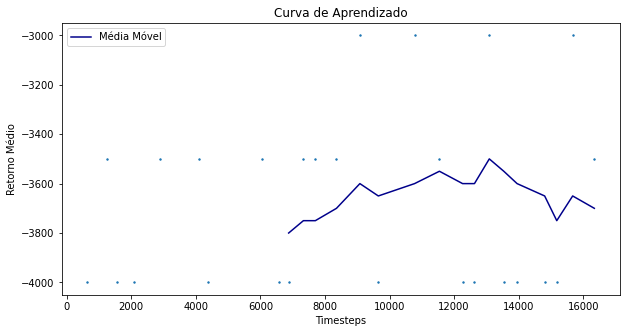

In [16]:
### Espaço livre para testagem de diferentes algoritmos

from sb3_contrib import ARS # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = gym.make(env_name)

# Encapsula ele no wrapper Monitor
env = Monitor(env, log_dir)

model = ARS("MlpPolicy", env, seed=1, verbose=1) # Defina o modelo
model.learn(total_timesteps= 10000) # Treine o modelo
n_episodes = 10 # Defina o número de episódios

# Avaliando o agente e guardando o desempenho no dicionário
algorithms_dict = getValues(model, env, n_episodes, algorithms_dict)

### Espaço para o Piloto criar gráficos ou textos para mostrar os diferentes resultados entre modelos
plot_results(log_dir)

##%# DQN

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Using cpu device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 581      |
|    ep_rew_mean      | -4e+03   |
|    exploration_rate | 0.853    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1082     |
|    time_elapsed     | 2        |
|    total_timesteps  | 2324     |
----------------------------------
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 699       |
|    ep_rew_mean      | -2.88e+03 |
|    exploration_rate | 0.646     |
| time/               |           |
|    episodes         | 8         |
|    fps              | 1132      |
|    time_elapsed     | 4         |
|    total_timesteps  | 5592      |
-----------------------------------
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 673       |
|    ep_rew_mean      | -3.21e+03 |
|    exploration_rate |

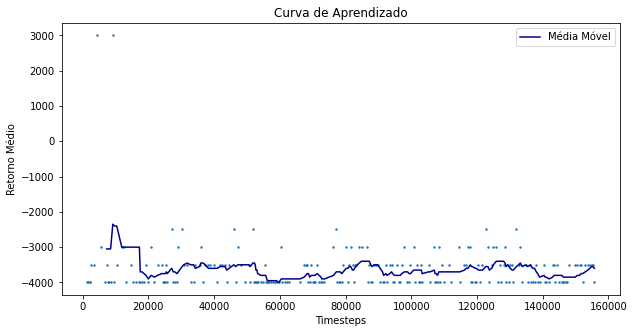

In [17]:
### Espaço livre para testagem de diferentes algoritmos

from stable_baselines3 import DQN # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = gym.make(env_name)

# Encapsula ele no wrapper Monitor
env = Monitor(env, log_dir)

model = DQN("MlpPolicy", env, seed=1, verbose=1) # Defina o modelo
model.learn(total_timesteps= 150000) # Treine o modelo
n_episodes = 10 # Defina o número de episódios

# Avaliando o agente e guardando o desempenho no dicionário
algorithms_dict = getValues(model, env, n_episodes, algorithms_dict)

### Espaço para o Piloto criar gráficos ou textos para mostrar os diferentes resultados entre modelos
plot_results(log_dir)

#### Results

In [18]:
algorithms_dict

{'PPO': {'mean_reward': 4000.0, 'std_reward': 0.0},
 'A2C': {'mean_reward': -3600.0, 'std_reward': 435.88989435406734},
 'TRPO': {'mean_reward': 4000.0, 'std_reward': 0.0},
 'ARS': {'mean_reward': -3700.0, 'std_reward': 400.0},
 'DQN': {'mean_reward': -3600.0, 'std_reward': 200.0}}

A seguir, detalhe um pouco mais quais foram os algoritmos testados bem como a performance obtida por cada um.

Este detalhamento pode ser feito por meio de um ou mais gráficos mostrando o desempenho dos modelos, ou simplesmente por texto.

O detalhamento do desempenho de cada modelo foi feito dentro do espaço em que cada um deles foi treinado por meio de gráficos.

Na célula de código acima, podemos ver o que os gráficos de aprendizado já nos demonstram: os melhores modelos para o ambiente do Turing são o PPO e o TRPO.

Os demais apresentam média de recompensa negativa e, portanto, não são de nosso interesse.

Vamos trabalhar com o TRPO para tunar os hiperparâmetros, considerando que seu gráfico de desempenho é estritamente crescente e leva menos timesteps para atingir as mesmas métricas que o PPO.

In [21]:
### Espaço para o Piloto criar gráficos ou textos para mostrar os diferentes resultados entre modelos
### Gráficos plotados acima

### Escolha do Algoritmo

Após testar e analisar diversos algoritmos diferentes, qual foi o escolhido?

_Pergunta Extra:_ você usou algum critério para escolher quais algoritmos seriam testados?

In [20]:
### Qual foi o algoritmo escolhido?
### TRPO - critérios: gráfico de desempenho e mean_reward/std_reward

### Exercício 2 - Mudança de Hiperparâmetros

No segundo exercício, você deve testar diferentes hiperparâmetros para seu modelo escolhido!

Todos os modelos da Stable Baselines têm diversos parâmetros detalhados em sua documentação ([exemplo: PPO](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#parameters)) que podem ser modificados para alterar o modelo.

Para modificar os parâmetros de um algoritmo, tal como o ```PPO(...)```, basta especificá-los durante a construção do modelo, da seguinte forma:

In [30]:
model = PPO("MlpPolicy", env, seed=1, verbose=1,
           learning_rate=0.0007, gamma=0.9) # Especificando diferentes valores para a learning_rate e para o gamma

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Se quiser, você também pode alterar a arquitetura das redes neurais do modelo, da seguinte forma:

In [32]:
import torch
import inspect

# Parâmetros das redes neurais
policy_kwargs = dict(activation_fn=torch.nn.ReLU,                # Troca a função de ativação para ReLU
                     net_arch=[dict(pi=[32, 32], vf=[32, 32])])  # Define a arquitetura das redes do Actor-Critic

# Cria o nosso modelo com os novos parâmetros
model = PPO("MlpPolicy", env, seed=1, verbose=1, 
            policy_kwargs=policy_kwargs) # Especificando outra arquitetura de rede

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Caso queira ler um pouco mais sobre essas diferentes arquiteturas, recomendamos [a seguinte página da documentação da biblioteca.](https://stable-baselines3.readthedocs.io/en/master/guide/custom_policy.html)

A seguir, preparamos uma outra função útil para guardar os parâmetros testados:

In [22]:
def getValuesAndParams(model, env, n_episodes, info_dict):
    
    model_name = model.__class__.__name__
    env_name = env.unwrapped.__class__.__name__
    
    mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=n_episodes, deterministic=True)
    
    args = inspect.getfullargspec(model.__class__).args
    func_params_dict = {}
    for arg in args:
        p = model.__dict__.get(arg)
        if type(p) in [None, int, float, str, dict]:
            func_params_dict[arg] = p
    
    
    if model_name not in info_dict:
        info_dict[model_name] = {}
        
    if "env" not in info_dict[model_name]:
        info_dict[model_name]["env"] = []
        
    info_dict[model_name]["env"].append(env_name)
        
    if "mean_reward" not in info_dict[model_name]:
        info_dict[model_name]["mean_reward"] = []
        info_dict[model_name]["std_reward"] = []
        
    if "class_args" not in info_dict[model_name]:
        info_dict[model_name]["class_args"] = []
        
    info_dict[model_name]["mean_reward"].append(mean_reward)
    info_dict[model_name]["std_reward"].append(std_reward)
    info_dict[model_name]["class_args"].append(func_params_dict)
    
    params_dict = model.get_parameters()
    if "policy.optimizer" not in params_dict:
        if "actor.optimizer" not in info_dict[model_name]:
            info_dict[model_name]["actor.optimizer"] = []
            info_dict[model_name]["critic.optimizer"] = []

        info_dict[model_name]["actor.optimizer"] += params_dict["actor.optimizer"]["param_groups"]
        info_dict[model_name]["critic.optimizer"] += params_dict["critic.optimizer"]["param_groups"]
    
    else:
        if "policy.optimizer" not in info_dict[model_name]:
            info_dict[model_name]["policy.optimizer"] = []
    
        info_dict[model_name]["policy.optimizer"] += params_dict["policy.optimizer"]["param_groups"]
    
    return info_dict

parameters_dict = {}

A seguir, você está livre para testar diferentes hiperparâmetros para o algoritmo escolhido! Você deve testar valores diversos para pelo menos **dois** parâmetros. Se quiser algumas sugestões, recomendamos realizar testes no `gamma`, na `learning_rate` ou na arquitetura da rede neural do modelo.

In [33]:
from sb3_contrib import TRPO # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = gym.make(env_name)

model = TRPO("MlpPolicy", env, seed=1, verbose=1,
           learning_rate=0.0007, gamma=0.9) # Defina o modelo
model.learn(total_timesteps = 100000) # Treine o modelo
n_episodes = 10 # Defina o número de episódios

# Avaliando o agente
parameters_dict = getValuesAndParams(model, env, n_episodes, parameters_dict)

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -4e+03   |
| time/              |          |
|    fps             | 497      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 809      |
|    ep_rew_mean          | -3.7e+03 |
| time/                   |          |
|    fps                  | 463      |
|    iterations           | 2        |
|    time_elapsed         | 8        |
|    total_timesteps      | 4096     |
| train/                  |          |
|    explained_variance   | 0.00156  |
|    is_line_search_su... | 1        |
|    kl_divergence_loss   | 0.00356  |
|    learning_rate        | 0.0007   |
|    n_updates      

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


In [34]:
from stable_baselines3 import PPO # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = gym.make(env_name)

model = TRPO("MlpPolicy", env, seed=1, verbose=1,
           learning_rate= 0.00003, gamma=0.03) # Defina o modelo
model.learn(total_timesteps = 100000) # Treine o modelo
n_episodes = 10 # Defina o número de episódios

# Avaliando o agente
parameters_dict = getValuesAndParams(model, env, n_episodes, parameters_dict)

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -4e+03   |
| time/              |          |
|    fps             | 372      |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 2048     |
---------------------------------
--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 664      |
|    ep_rew_mean          | -4e+03   |
| time/                   |          |
|    fps                  | 386      |
|    iterations           | 2        |
|    time_elapsed         | 10       |
|    total_timesteps      | 4096     |
| train/                  |          |
|    explained_variance   | 0.00116  |
|    is_line_search_su... | 1        |
|    kl_divergence_loss   | 0.00391  |
|    learning_rate        | 3e-05    |
|    n_updates      

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


In [35]:
from stable_baselines3 import PPO # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = gym.make(env_name)

model = TRPO("MlpPolicy", env, seed=1, verbose=1,
           learning_rate= 0.3, gamma=0.03) # Defina o modelo
model.learn(total_timesteps = 100000) # Treine o modelo
n_episodes = 10 # Defina o número de episódios

# Avaliando o agente
parameters_dict = getValuesAndParams(model, env, n_episodes, parameters_dict)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -4e+03   |
| time/              |          |
|    fps             | 642      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 664      |
|    ep_rew_mean          | -4e+03   |
| time/                   |          |
|    fps                  | 510      |
|    iterations           | 2        |
|    time_elapsed         | 8        |
|    total_timesteps      | 4096     |
| train/                  |          |
|    explained_variance   | 0.00116  |
|    is_line_search_su... | 1        |
|    kl_divergence_loss   | 0.00391  |
|    learning_rate        | 0.3      |
|    n_updates      

In [36]:
from stable_baselines3 import PPO # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = gym.make(env_name)

model = TRPO("MlpPolicy", env, seed=1, verbose=1,
           learning_rate= 0.3, gamma=0.3) # Defina o modelo
model.learn(total_timesteps = 100000) # Treine o modelo
n_episodes = 10 # Defina o número de episódios

# Avaliando o agente
parameters_dict = getValuesAndParams(model, env, n_episodes, parameters_dict)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -4e+03   |
| time/              |          |
|    fps             | 685      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 809      |
|    ep_rew_mean          | -3.7e+03 |
| time/                   |          |
|    fps                  | 577      |
|    iterations           | 2        |
|    time_elapsed         | 7        |
|    total_timesteps      | 4096     |
| train/                  |          |
|    explained_variance   | 0.00144  |
|    is_line_search_su... | 1        |
|    kl_divergence_loss   | 0.00365  |
|    learning_rate        | 0.3      |
|    n_updates      

In [38]:
from stable_baselines3 import PPO # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = gym.make(env_name)

model = TRPO("MlpPolicy", env, seed=1, verbose=1,
           learning_rate= 0.00003, gamma=0.7) # Defina o modelo
model.learn(total_timesteps = 100000) # Treine o modelo
n_episodes = 10 # Defina o número de episódios

# Avaliando o agente
parameters_dict = getValuesAndParams(model, env, n_episodes, parameters_dict)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -4e+03   |
| time/              |          |
|    fps             | 293      |
|    iterations      | 1        |
|    time_elapsed    | 6        |
|    total_timesteps | 2048     |
---------------------------------
--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 809      |
|    ep_rew_mean          | -3.7e+03 |
| time/                   |          |
|    fps                  | 332      |
|    iterations           | 2        |
|    time_elapsed         | 12       |
|    total_timesteps      | 4096     |
| train/                  |          |
|    explained_variance   | 0.00176  |
|    is_line_search_su... | 1        |
|    kl_divergence_loss   | 0.00332  |
|    learning_rate        | 3e-05    |
|    n_updates      

In [39]:
from stable_baselines3 import PPO # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = gym.make(env_name)

model = TRPO("MlpPolicy", env, seed=1, verbose=1,
           learning_rate= 0.00003, gamma=0.85) # Defina o modelo
model.learn(total_timesteps = 100000) # Treine o modelo
n_episodes = 10 # Defina o número de episódios

# Avaliando o agente
parameters_dict = getValuesAndParams(model, env, n_episodes, parameters_dict)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -4e+03   |
| time/              |          |
|    fps             | 732      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 809      |
|    ep_rew_mean          | -3.7e+03 |
| time/                   |          |
|    fps                  | 624      |
|    iterations           | 2        |
|    time_elapsed         | 6        |
|    total_timesteps      | 4096     |
| train/                  |          |
|    explained_variance   | 0.00168  |
|    is_line_search_su... | 1        |
|    kl_divergence_loss   | 0.00341  |
|    learning_rate        | 3e-05    |
|    n_updates      

In [40]:
### Espaço livre para a comparação dos hiperparâmetros
parameters_dict

{'TRPO': {'env': ['PongEnv',
   'PongEnv',
   'PongEnv',
   'PongEnv',
   'PongEnv',
   'PongEnv'],
  'mean_reward': [3700.0, 4000.0, -3550.0, -3050.0, 3750.0, 3700.0],
  'std_reward': [900.0, 0.0, 350.0, 1916.37678967368, 750.0, 331.66247903554],
  'class_args': [{'learning_rate': 0.0007,
    'n_steps': 2048,
    'batch_size': 128,
    'gamma': 0.9,
    'cg_max_steps': 15,
    'cg_damping': 0.1,
    'line_search_shrinking_factor': 0.8,
    'line_search_max_iter': 10,
    'n_critic_updates': 10,
    'gae_lambda': 0.95,
    'sde_sample_freq': -1,
    'target_kl': 0.01,
    'sub_sampling_factor': 1,
    'policy_kwargs': {},
    'verbose': 1,
    'seed': 1},
   {'learning_rate': 3e-05,
    'n_steps': 2048,
    'batch_size': 128,
    'gamma': 0.03,
    'cg_max_steps': 15,
    'cg_damping': 0.1,
    'line_search_shrinking_factor': 0.8,
    'line_search_max_iter': 10,
    'n_critic_updates': 10,
    'gae_lambda': 0.95,
    'sde_sample_freq': -1,
    'target_kl': 0.01,
    'sub_sampling_facto

* gamma: [0.9, 0.03, 0.03, 0.3, 0.7, 0.85]
* learning_rate: [0.0007, 0.00003, 0.3, 0.3, 0.00003, 0.00003]
* 'mean_reward': [3700.0, 4000.0, -3550.0, -3050.0, 3750.0, 3700.0],
* 'std_reward': [900.0, 0.0, 350.0, 1916.37678967368, 750.0, 331.66247903554]

Podemos ver que valores muito altos de learning_rate implicam um mean_reward bem baixo e std_reward bem alto (performance ruim). Nesse caso, quanto menor, melhor.

Por outro lado, no geral, deseja-se um valor de desconto gamma que não seja tão baixo. Nota-se que, aumentando os valores de gamma, a tendência é a de que tenhamos uma melhora na performance do modelo TRPO.